

# Dimensionality Reduction</br>
<hr style="height:1px; border:none; background-color:#00A6D6;">



Here is a guide to the different symbols of the lab: <br>
<span style="font-size: 20px">❓</span> - This symbol means that there is a required theoretical question related to the assignment. Your answer to the specified question should go in the yellow box below it. <br>
<span style="font-size: 20px">ℹ️</span> - This symbol means that there is some additional or important information related to the lab or specific exercise. <br>
<span style="font-size: 20px">💬</span> - This symbol means that the following text is part of the overarching story you follow, giving you more context into what you are doing and how it is applicable in real life situations.

__Objectives__

- Analyse a dataset in terms of the variance distribution among axis
- Extract the Principal components of a given dataset using the eigenvalue decomposition
- Explain the meaning behind each value of an eigen pairs
- Define the amount of variance on each of the Principal components
- Apply the PCA dimensionality reduction
- Apply the scree test to choose the optimal number of principal components to use.

<hr>

<div style="padding:10px" >
<font size=4>ℹ️</font>
<i>
 Some code cells and exercises have some code already provided for you to use. The steps for the exercises you need to do in the code cells are marked with comments. Your code should go under the corresponding comment line describing the specific step with a "TODO" at the start of the commented items.
</i> 

    
ℹ️ If Jupyter notebooks creates a scrollable window which you would like to disable, so you can see your results clearly, you can do so with `Cell > All Output > Toggle Scrolling`.

In [1]:
##########################################################################################
# Importing various modules. These will be used throughout this Jupyter Notebook
# You do not need to add anything here
##########################################################################################

# # If you're having problems with the imports uncomment the following lines to install the libraries
# !pip install numpy
# !pip install matplotlib


# importing required libraries

# import matplotlib for data visualisation
import matplotlib.pyplot as plt

# import NumPy for better matrix support
import numpy as np

# import math for formulas
import math

# import scipy for easier data processing
from sklearn.decomposition import PCA

## PYTHON HANDS-ON Assignment 1: PCA on Dummy dataset


<b> Completion requirements for this assignment: </b>
- Apply the PCA of a self-created dataset 
- Implement the dimensionality reduction step of the PCA technique
- Document the parts of the code that you implement 
- Answer all the questions regarding the process and images

In this assignment we are experimenting with our own created datasets. The goal is to get a deeper understanding of 
- how to analyse a dataset in terms of its principal components
- The intuition behind the principal components of the data
- How to use the Principal components of a dataset to apply dimensionality reduction in a smart way to keep as much variance of the data as possible

Some of the datasets we are creating are in the shape of a straight line. That means, there is a direct relation between the  features of these dataset. That also means, using only one feature that has the direction of the straight line equation of a dataset will be a more compact way of representing the data. This line direction is the linear combination of the original features of the dataset. That would be the direction of the first principal component of the dataset following the PCA dimensionality reduction technique.

Later on, We will also investigate the PCA technique on square shaped datasets with zero correlation between features. 


<div style="background-color:#c2eafa"> 
    
### 1.1 Create a dummy dataset
Run the code block below on the defined dataset. The code below contains two main steps:
- Pre-processing step to make the data zero_mean
- Visualise the shape of the data 



[[ 1  4]
 [ 2  5]
 [-1  2]
 [-2  1]
 [ 3  6]]
[[ 0.4  0.4]
 [ 1.4  1.4]
 [-1.6 -1.6]
 [-2.6 -2.6]
 [ 2.4  2.4]]


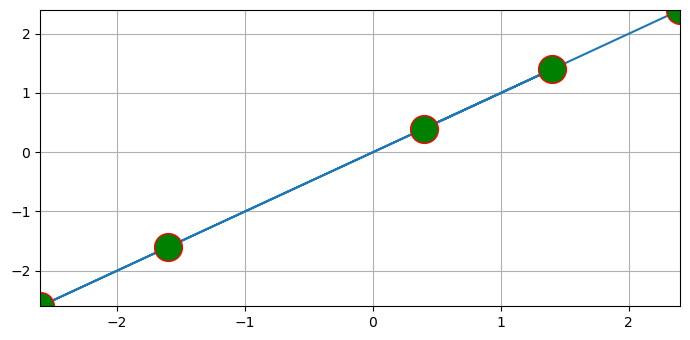

In [2]:

# Creation of straight line shaped datasets

# Dataset 5: data on one line of angle 45 degrees translated +3 on Y direction
# expected same PCs as in x_unform_4
D_5 = np.array([[1, 4],[2, 5],[-1, 2],[ -2, 1], [3, 6]])
print(D_5)
# Data preprocessing step: Subtract the mean of the data points to have zero-mean data
# Data preprocessing step to make it of zero mean
D_5_zero_mean=D_5-np.mean(D_5,axis=0)


# Choose the dataset that will be analysed
Data_matrix= D_5_zero_mean;
print(Data_matrix)


# Draw/ visualise the dataset points in the feature space
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.xlim(Data_matrix[:,0].min(), Data_matrix[:,0].max())
plt.ylim(Data_matrix[:,1].min(), Data_matrix[:,1].max())
plt.grid()
plt.plot(Data_matrix[:,0], Data_matrix[:,1], marker="o", markersize=20, markeredgecolor="red", markerfacecolor="green")
plt.show()


In [5]:
np.mean(D_5,axis=0)

array([0.6, 3.6])



<div style="background-color:#f1be3e"> 
    
### Questions:
    
<hr><span style="font-size: 20px">❓</span> <i>
Which feature has more spread of data, x-feature , or the y-feature? 
</i>
    
**Same**
    
    
<hr><span style="font-size: 20px">❓</span> <i>
Is there a relation between features 1 & 2? 
</i>
    
**Yes**
    
<hr><span style="font-size: 20px">❓</span> <i>
What is the direction of the maximum variance in data?  
</i>
    
**Along the y=x line (45 degrees), which is the direction of the principal component of the data.**    
    
    
<hr><span style="font-size: 20px">❓</span> <i>
How many Principal components to expect? why?   
</i>
    
**1 principal component, because all the data lie strictly on a straight line, which means that one component is sufficient to describe the entire variance in the data.** 
    
<hr><span style="font-size: 20px">❓</span> <i>
What is the size of the data covariance matrix?  
</i>
    
**2x2** 

</div>


The second step of the PCA technique is to create the covariance matrix of the data. Here are some important information about any dataset covariance matrix:
- It is is a square, symmetric matrix
- The size of it is N * N, where N is the number of features of the original space, or the dimensionality of the original space.
- The values of the diagonal elements of the matrix are the variances along each original feature direction.
- The off-diagonal elements are the covariances between each feature and all the other features.


Then , this step is followed by the eigenvalue decomposition of the covariance matrix to get the eigenpairs. Each eigen pair contains:
- Eigenvalue: encodes the amount of variance along a principal direction of the data.
- Eigenvector: encodes the direction of the variance. It also encodes the linear equation of the new features to be used by the PCA technique.


The following information can be concluded from an eigenpair values:
- The dimensionality of the original feature space ; defined by the number of elements of the eigenvector
- The exact variance along PC direction ; defined by the eigenvalue
- The contribution of each of the original features to the new Principal component, or the new feature that is a linear combination of the original features; defined by the values of the eigenvector.

For example, an eigen pair that has an eigenvalue of 4, and an eigenvector [1,0,-1] can give us the following information:
- The dimensionality of the original feature space is 3 because the number of elements of the eigenvector are 3 elements.
- The variance along the direction of [1,0,-1] is  4 
- The new feature represented by this eigen pair is a linear combination of the original 3 features . The exact combination is following this equation: 
`New_feature = 1* feature_1 + 0 * feature_2 - 1* feature_3 `
That means that for that principal component, feature_2 has no contribution & it only depends on features_1 & 2. 

<div style="background-color:#c2eafa"> 
    
### 1.2 Eigenvalue decomposition of data covariance matrix
  
To investigate the meaning how the variance spread changes after using the PCA technique, apply the following:
1. Calculate the data covariance matrix using this function
    * `covMatrix = np.cov(np.transpose(data),bias=True)`.
2. Print the variance along each of the original feature directions. 
3. Print the sum of variances of all the original feature directions of the data. 
4. Decompose the covariance matrix of the `Data_matrix` variable to its eigen pairs using the following command 
    * `V , U = np.linalg.eig(covMatrix)`.
5. Print the sum of variances along each Principal component direction.
6. Make sure that the eigenvectors are in the correct order, if not , then order them based on their eigenvalues.
7. Project the data points on the PCA space. You can use matrix multiplication function to apply this step using this function
    * `z_mat=np.matmul(x_mat,y_mat)`
    
    
<span style="font-size: 20px">ℹ️</span> <i>Note that you might need to round the numbers to the 3rd decimal space or so to ignore the very small variations after numerical calculation. You can use this function to do so `np.round_(varaible_name , decimals=0)`.</i>
    
<span style="font-size: 20px">ℹ️</span> <i>Make sure to take only the real part of the variables returned from the eigenvalue decomposition using the function `variable_name.real`. The decomposition of the covariance matrix should always be real, but due to computational rounding errors, you might get a very small negligible imaginary number.
</i>


In [15]:
Data_matrix

array([[ 0.4,  0.4],
       [ 1.4,  1.4],
       [-1.6, -1.6],
       [-2.6, -2.6],
       [ 2.4,  2.4]])

Variance along each of the original feature direction
 [3.44 3.44]
[0 1]
Eigenvectors Sorted based on eigenvalues [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


C:\Users\20123\AppData\Local\Temp\ipykernel_77988\3612719771.py:30: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(Data_PCA_projected[:,1].min(), Data_PCA_projected[:,1].max())


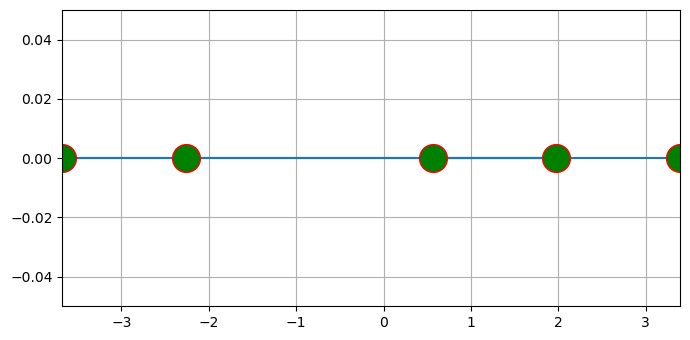

In [22]:


# TODO: Calculate the data covariance matrix
covMatrix = np.cov(Data_matrix.T, bias=True)

# TODO: Print the variance along each of the original feature direction
print('Variance along each of the original feature direction\n', np.round(np.diag(covMatrix), decimals=3))

# TODO: Decompose the covariance matrix to it's eigen pairs, where V is the eigenvalues variable name , 
#.      & U is the eigenvectors projection matrix
V, U = np.linalg.eig(covMatrix)
V = V.real  # Take only the real part of the eigenvalues
U = U.real  # Take only the real part of the eigenvectors

# Order the eigen pairs based on the eigenvalues
eigen_value_sort_decending_idx=np.flip(np.argsort(V))
print(eigen_value_sort_decending_idx)
U=U[:,eigen_value_sort_decending_idx]
V=V[eigen_value_sort_decending_idx]

# Print the projection matrix
print('Eigenvectors Sorted based on eigenvalues', U)

# TODO: Project the Data on the PCA space; this step corresponds to description step of the PCA technique
Data_PCA_projected = np.matmul(Data_matrix, U)
Data_PCA_projected = np.round(Data_PCA_projected, decimals=3)

# Draw/ visualise the dataset points in the PCA feature space
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.xlim(Data_PCA_projected[:,0].min(), Data_PCA_projected[:,0].max())
plt.ylim(Data_PCA_projected[:,1].min(), Data_PCA_projected[:,1].max())
plt.grid()
plt.plot(Data_PCA_projected[:,0], Data_PCA_projected[:,1], marker="o", markersize=20, markeredgecolor="red", markerfacecolor="green")
plt.show()


In [20]:
Data_PCA_projected

array([[ 5.65685425e-01, -1.11022302e-16],
       [ 1.97989899e+00,  0.00000000e+00],
       [-2.26274170e+00,  0.00000000e+00],
       [-3.67695526e+00,  0.00000000e+00],
       [ 3.39411255e+00,  0.00000000e+00]])



<div style="background-color:#f1be3e"> 
    
### Questions:
<hr><span style="font-size: 20px">❓</span> <i>
What is the expected shape of data after projection on only the first principal component?
</i>
    
**aligned along a line**
    
        
<hr><span style="font-size: 20px">❓</span> <i>
What is the percentage of variance covered by each Principal component?
</i>
    
**100% and 0**
    
    
<hr><span style="font-size: 20px">❓</span> <i>
What is the minimum amount of Principal component needed to represent the data without any lose of variance? In other words, what is the intrinsic dimensionality of the data? 
</i>
    
**1**
    
<hr><span style="font-size: 20px">❓</span> <i>
What is the difference between the sum of variances along the original feature space vs. the sum of variances along the principal components?
</i>
    
**There should be no difference between the sum of variances along the original feature space and the sum of variances along the principal components.**
    
    

</div>

A common method for determining the optimal number of PCs to be retained when reducing dimensions is, a graphical representation known as a **scree plot**. 
A **scree plot** is a line plot of the eigenvalues of principal components in an analysis. It shows the eigenvalues on the y-axis and the number of factors on the x-axis. 
The procedure of finding statistically significant components using a scree plot is also known as a scree test. 

A scree plot always displays the eigenvalues in a downward curve, ordering the eigenvalues from largest to smallest. According to the scree test, the **"elbow"** of the graph where the eigenvalues seem to level off is found and factors or components to the left of this point should be retained as significant.

Most scree plots look broadly similar in shape, starting high on the left, falling rather quickly, and then flattening out at some point. This is because the first component usually explains much of the variability, the next few components explain a moderate amount, and the latter components only explain a small fraction of the overall variability. The scree plot criterion looks for the “elbow” in the curve and selects all components just before the line flattens out. (In the PCA literature, the plot is called a ‘Scree’ Plot because it often looks like a ‘scree’ slope, where rocks have fallen down and accumulated on the side of a mountain.)

<span style="font-size: 20px">ℹ️</span> You can read more about it from: https://sanchitamangale12.medium.com/scree-plot-733ed72c8608

<div style="background-color:#c2eafa"> 
    
### 1.3  Analysing the variance coverage of each of the eigenvectors
    
Complete the implementation of the `create_scree_plot` function by filling in the `TODO` section with the Calculation of the percentages of variance explained by each principal component,make sure to assign your calculations to the variable `PC_explained_variance_percentage`. This variable is a 1-D array with percentages of the relative variances of the input V vector.
    
<span style="font-size: 20px">ℹ️</span> <i>A function that can help in determining the `k` value required to retain a p% of data variance is `np.cumsum(1-D array)`. This function calculated the cumulative sum of an input array.</i>


The variances along PCs in values [6.88 0.  ]
The variances along PCs in percentages [100.   0.]


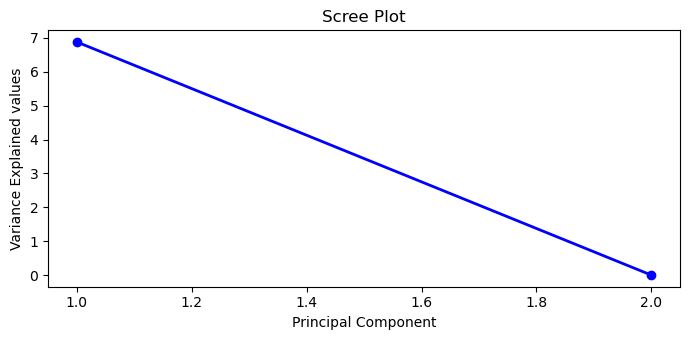

In [23]:
def create_scree_plot(V):
    print('The variances along PCs in values',V)
    
    # TODO: calculate the percentages of variance explained by each principal component and
    #       assign it to the variable 'PC_explained_variance_percentage'
    PC_explained_variance_percentage= V/np.sum(V)*100
    
    print('The variances along PCs in percentages',PC_explained_variance_percentage)
    # create the X axis indices for a nice plot
    PC_values = np.arange(V.size)+1
    # prepare a plot with the indices of the ordered PC variances on the X-axis, and the actual variances on the y-axis  
    plt.plot(PC_values, V, 'o-', linewidth=2, color='blue')
    # add a title to the plot
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained values')
    plt.show()
    

# Calling the create plot function to draw the scree plot corresponding to our dataset PCs   
create_scree_plot(V)


<div style="background-color:#f1be3e"> 
    
### Questions:
    
<hr><span style="font-size: 20px">❓</span> <i>
How many Principal components needed to retain at least 90% of the variance in our dataset? 
</i>
    
**1**
    

</div>

<div style="background-color:#c2eafa"> 
    
### 1.4 Reduce dimensions of the data

Instead of projecting the datapoints on all the Principal components of the data. Experiment with projecting the datapoints on `k` Principal components. Think about what would be the best `k` for this dataset.  

In [29]:

# Project the Data on the PCA space; this step corresponds to description step of the PCA technique
# TODO: Try different values of k.
k=1
Data_PCA_projected = np.matmul(Data_matrix ,U[:,0:k] )
print(Data_PCA_projected)



[[ 0.56568542]
 [ 1.97989899]
 [-2.2627417 ]
 [-3.67695526]
 [ 3.39411255]]


<div style="background-color:#f1be3e"> 
    
### Questions:
    
<hr><span style="font-size: 20px">❓</span> <i>
What is the value of `k` chosen? Motivate your choice. 
</i>
    
**1**
 
    
<hr><span style="font-size: 20px">❓</span> <i>
Using k=1 in the PCA technique, the dimensionality of the data is now 1. Now , the dataset has only one feature. Which feature from the original feature set is kept in this case? Explain your answer. 
</i>
    
**What is retained is a new feature, which is a weighted linear combination of all the original features. This combination forms a new axis in the new feature space.**

</div>

<div style="background-color:#c2eafa"> 
    
### 1.5 Putting it together
Put all the previous PCA steps in one function that takes the dataset points `Data_matrix` & the `k` number of principal components required. The output of this function should be the projected data points `Data_PCA_projected`, the eigenvectors `eignen_vectors` & eigenvalues `eigen_values` of the data input.
    
<span style="font-size: 20px">ℹ️</span> <i> You can apply the PCA using a library function. For further documentation about it, check this: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html </i>

In [41]:
def pca_function(Data_matrix=[0,0],k= float('inf')):
    
    # If K is not in the inputs, then K is set to the original dimensionality of the data
    num_datapoints, num_features = Data_matrix.shape
    k=int(np.min([k,num_features]))
    
   
    # Data preprocessing step: Subtract the mean of the data points to have zero-mean data
    # TODO: Data preprocessing step to make it of zero mean
    data = Data_matrix-np.mean(Data_matrix,axis=0)
   
    # TODO: Calculate the data covariance matrix
    covMatrix = np.cov(data.T, bias=True)
    
    # TODO: Decompose the covariance matrix to it's eigen pairs
    V, U = np.linalg.eig(covMatrix)
    
   
    # Order the eigen pairs based on the eigenvalues 
    eigen_value_sort_decending_idx=np.flip(np.argsort(V))
    U=U[:,eigen_value_sort_decending_idx]
    V=V[eigen_value_sort_decending_idx]
    
    # TODO: Project the Data on the PCA space; this step corresponds to description step of the PCA technique
    Data_PCA_projected = np.matmul(data, U[:,0:k])
    # neglecting any rounding errors
    Data_PCA_projected=np.round_(Data_PCA_projected,3)
    eignen_vectors=np.round_(U.real ,3)
    eigen_values=np.round_(V.real,3)
    # create_scree_plot(V)
    
    return Data_PCA_projected , eignen_vectors, eigen_values

# TODO: Call the function to compare the function result with the previous exercise results
Data_PCA_projected , eignen_vectors, eigen_values = pca_function(Data_matrix,1)

    

C:\Users\20123\AppData\Local\Temp\ipykernel_77988\400819327.py:35: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  Data_PCA_projected , eignen_vectors, eigen_values = pca_function(Data_matrix,1)


<div style="background-color:#c2eafa"> 
    
### 1.6 PCA on more self-generated datasets

The code below has different simple datasets. Choose one or two more of the datasets given below & re-run the previous steps of the PCA dimensionality reduction. 
Create one more dataset of your own to explore more.

In [42]:

# Dataset 1: zero covariance data and the original features are the best option
D_1 = np.array([[0, 1],[0 ,-1],[-1, 0],[ 1 ,0]])

# Dataset 2: zero covariance data and shifted data the original features are the best option
D_2 = np.array([[2, 1],[2 ,-1],[1, 0], [3, 0]])

# Dataset 3: square shaped data points with zero covariance data
D_3 = np.array([[1 ,1],[1, -1],[-1, 1],[-1, -1]])

# Dataset 4: data on one line of angle 45 degrees passing through origin
D_4 = np.array([[1, 1],[2, 2],[-1, -1],[-2, -2]])

# TODO: Apply the PCAon three more dataset and view the results.
Data_PCA_projected , eignen_vectors, eigen_values = [],[],[]
for i in [D_1,D_2,D_3,D_4]:
    Data_PCA_projected_temp , eignen_vectors_temp, eigen_values_temp = pca_function(i,1)
    Data_PCA_projected.append(Data_PCA_projected_temp)
    eignen_vectors.append(eignen_vectors_temp)
    eigen_values.append(eigen_values_temp)

C:\Users\20123\AppData\Local\Temp\ipykernel_77988\3897323702.py:16: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  Data_PCA_projected_temp , eignen_vectors_temp, eigen_values_temp = pca_function(i,1)


## PYTHON HANDS-ON Assignment 2: PCA on MNIST hand-written digits dataset


<b> Completion requirements for this assignment: </b>
- Explore the dataset by visualisation of the datapoints 
- Apply PCA dimensionality reduction technique on a given dataset
- Document the parts of the code that you implement 
- Answer all the questions regarding the process and images

<div style="background-color:#c2eafa"> 
    
### 2.1 Load and explore the MNIST dataset
    
In the `data` folder you can find a .csv file with the MNIST training dataset of images of hand-written digits. Here are some important information about the structure of the dataset:

- Each image in the dataset is of size 28*28 pixels, 784 pixel values.
- Each image is saved as a row in the .csv file of the reshaped image pixels to a 1-D vector of size 1*784.  
- There are 60000 images of hand-written digits in this dataset.
- Each row of the dataset contains the label of a numerical digit (values could be anything from 0 to 9), followed by the pixel values of the digit image. 
- Therefore, This dataset is of size `60000*785`. 

    
You are given two blocks of code,
- First block is to load the dataset and print its shape.
- Second block is to visualise some images of the dataset. We do so to have a sense of the features used to represent the datapoints.
    
Run the code of the two blocks. Then, experiment and visualise different digits from the given dataset. This can be done by changing the variable's `digit_id_row_number` value. 


In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# load the MNIST dataset file
data = pd.read_csv('data/mnist_train.csv', header=None)
# Convert data to numpy array to ease the calculations
datapoints = data.to_numpy()
# the dataset shape- rows are datapoints & columns are the features
datapoints.shape

(60000, 785)

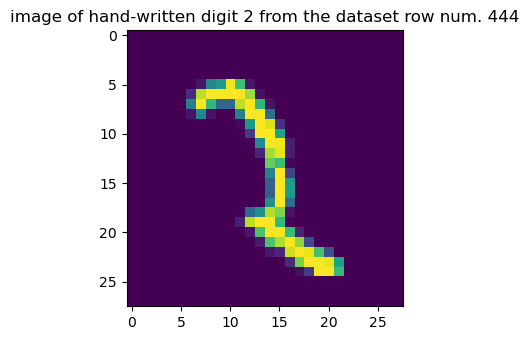

In [78]:
# Visualise example images for the digits

# Choose row number
# TODO: Try different values between 0 till 59999 then re-run the block
digit_id_row_number=444;

# Get the label of the image of that row number
digit_label=datapoints[digit_id_row_number,0]

# reshape the 1-D image feature vector to the original image shape of 28*28 pixels
digit=np.reshape(datapoints[digit_id_row_number,1:785],(28,28))

# Show the image of the chosen digit
plt.imshow((digit))
plt.title('image of hand-written digit '+ str(digit_label) +' from the dataset row num. '+ str(digit_id_row_number))
plt.show()

<div style="background-color:#c2eafa"> 
    
### 2.2 Apply PCA on the MNIST dataset

Run the PCA dimensionality reduction on the `MNIST` dataset. Then use the next code block to visualise the principal components as images. To do so, change the values of the variable `PC_id`, then run the code block again.

In [54]:
Data_matrix_MNIST=datapoints[:,1:785];
print(Data_matrix_MNIST.shape)
# TODO: Call PCA function to apply PCA on the MNIST dataset, 
#       use the variable name "projection_PCs_matrix" for the projected data on the PCA space 




(60000, 784)


In [70]:
Data_PCA_projected , projection_PCs_matrix, eigen_values = pca_function(Data_matrix_MNIST)


C:\Users\20123\AppData\Local\Temp\ipykernel_77988\3933434052.py:1: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  Data_PCA_projected , projection_PCs_matrix, eigen_values = pca_function(Data_matrix_MNIST)


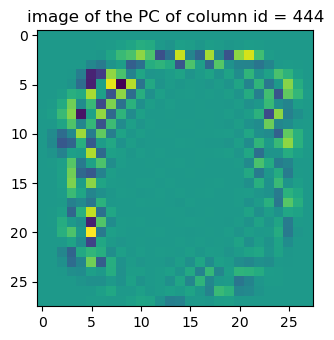

In [77]:
# Visualise the first few PCs as images 

# TODO: Change the PC_id value to view different individual PC projection vectors.
PC_id= 444;
# reshape the 1-D image feature vector to the original image shape of 28*28 pixels
PC_image=np.reshape(projection_PCs_matrix[:,PC_id],(28,28))

# Show the image of the chosen digit
plt.imshow((PC_image))
plt.title('image of the PC of column id = '+ str(PC_id))
plt.show()

<div style="background-color:#f1be3e"> 
    
### Questions:
    
<hr><span style="font-size: 20px">❓</span> <i>
Can you see any pattern in the visualised image of the first few principal components? Explain your answer. 
</i>
    
**The spots where distinct colors appear may indicate areas of high variance among the data points in the original dataset.**

<div style="background-color:#c2eafa"> 
    
### 2.3 Scree test and Variance retained

Create a scree plot for the variances along the principal components. Use the scree plot to determine the best K to choose for the dimensionality reduction.

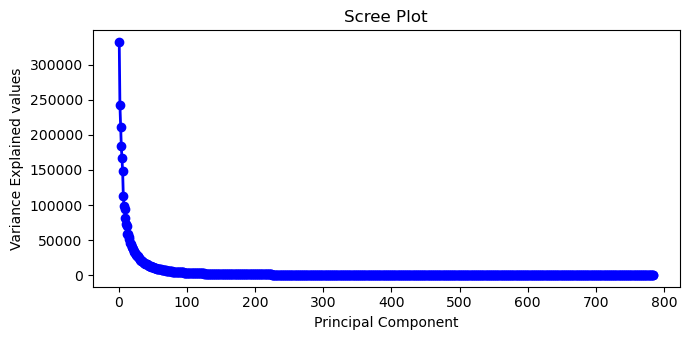

The variance retained when choosing 50 components is = 82.46468594967983


In [83]:
# TODO: create a scree plot of the variances along the principal components
create_scree_plot(eigen_values)

# choose the best k value based on the scree plot, 50 is chosen here

# TODO: Calculate the exact variance retained when choosing k components
retained_variance= np.sum(eigen_values[0:50])/np.sum(eigen_values)*100
print('The variance retained when choosing 50 components is =', retained_variance)


In [84]:
# calculate the cumulative variance along the principal components that are cumulatively retained over 90%
cumulative_variance=0
k=0
while cumulative_variance<90:
    cumulative_variance+=eigen_values[k]/np.sum(eigen_values)*100
    k+=1
print('The number of components needed to retain 90% of the variance is =', k)

The number of components needed to retain 90% of the variance is = 87


<div style="background-color:#f1be3e"> 
    
### Questions:
    
<hr><span style="font-size: 20px">❓</span> <i>
How many principal components `k` needed to retain at least 90% of the variance in the MNIST dataset? 
</i>
    
**87**
    
<hr><span style="font-size: 20px">❓</span> <i>
What is the exact percentage of the variance retained using the number of principal components chosen in the previous question? 
</i>
    
**82.46%**
    
<hr><span style="font-size: 20px">❓</span> <i>
What is the intrinsic dimensionality of the MNIST dataset? 
</i>
    
**87**
    

</div>